In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

## import data

In [4]:

# pd.describe_option('display')
df = pd.read_csv("msamd_14454.csv", low_memory=False)

df = df.dropna(subset=['census_tract'])
df['census_tract'] = df['census_tract'].astype(str).apply(lambda x: x.split(".")[0])
df.head()

,activity_year,lei,derived_msa-md,state_code,county_code,census_tract,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,derived_ethnicity,...,denial_reason-2,denial_reason-3,denial_reason-4,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
0,2021,549300DAUXQ2DCY4H838,14454,MA,25021.0,25021402102,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,NaN,NaN,NaN,4448,31.27,113700,91,1016,1519,72
1,2021,549300DAUXQ2DCY4H838,14454,MA,25021.0,25021403300,NC,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,NaN,NaN,NaN,4230,7.78,113700,179,1228,1394,60
2,2021,549300DAUXQ2DCY4H838,14454,MA,25023.0,25023503101,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,NaN,NaN,NaN,7312,2.95,113700,132,2099,2345,43
3,2021,549300DAUXQ2DCY4H838,14454,MA,25023.0,25023510900,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,NaN,NaN,NaN,2380,77.98,113700,18,16,343,51
4,2021,549300DAUXQ2DCY4H838,14454,MA,25025.0,25025130406,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,NaN,NaN,NaN,5399,69.98,113700,54,568,1437,48


### Drop irrelevant features

In [5]:
df.drop(["lei", "derived_msa-md","state_code","denial_reason-2", "denial_reason-3","denial_reason-4","aus-2", "aus-3", "aus-4","aus-5"], axis=1).head()
# df = df[["county_code","census_tract", "conforming_loan_limit"]]


,activity_year,county_code,census_tract,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,derived_ethnicity,derived_race,derived_sex,action_taken,...,initially_payable_to_institution,aus-1,denial_reason-1,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
0,2021,25021.0,25021402102,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Male,1,...,1,2,10,4448,31.27,113700,91,1016,1519,72
1,2021,25021.0,25021403300,NC,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Joint,4,...,1,1,10,4230,7.78,113700,179,1228,1394,60
2,2021,25023.0,25023503101,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Female,1,...,1,1,10,7312,2.95,113700,132,2099,2345,43
3,2021,25023.0,25023510900,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,Black or African American,Joint,3,...,1,1,9,2380,77.98,113700,18,16,343,51
4,2021,25025.0,25025130406,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,1,...,1,1,10,5399,69.98,113700,54,568,1437,48


### map load

In [6]:
import geopandas as gpd
shapefile_path = "../spark/census_tract_map/Census2020_Tracts.shp"

tracts = gpd.read_file(shapefile_path)

tracts.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    207 non-null    int64   
 1   STATEFP20   207 non-null    object  
 2   COUNTYFP20  207 non-null    object  
 3   TRACTCE20   207 non-null    object  
 4   GEOID20     207 non-null    object  
 5   NAME20      207 non-null    object  
 6   NAMELSAD20  207 non-null    object  
 7   MTFCC20     207 non-null    object  
 8   FUNCSTAT20  207 non-null    object  
 9   ALAND20     207 non-null    int64   
 10  AWATER20    207 non-null    int64   
 11  INTPTLAT20  207 non-null    object  
 12  INTPTLON20  207 non-null    object  
 13  Shape_STAr  207 non-null    float64 
 14  Shape_STLe  207 non-null    float64 
 15  geometry    207 non-null    geometry
dtypes: float64(2), geometry(1), int64(3), object(10)
memory usage: 26.0+ KB


In [7]:
tracts.head()

,OBJECTID,STATEFP20,COUNTYFP20,TRACTCE20,GEOID20,NAME20,NAMELSAD20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,Shape_STAr,Shape_STLe,geometry
0,1,25,025,140202,25025140202,1402.02,Census Tract,G5020,S,1538599,17120,+42.2495181,-071.1175430,1.674441e+07,18525.133039,"POLYGON ((757373.036 2913676.433, 757377.218 2..."
1,2,25,025,140300,25025140300,1403,Census Tract,G5020,S,1548879,38736,+42.2587734,-071.1188131,1.708768e+07,24186.699503,"POLYGON ((756308.459 2916770.814, 756446.058 2..."
2,3,25,025,140400,25025140400,1404,Census Tract,G5020,S,1874512,11680,+42.2692219,-071.1118088,2.030132e+07,27404.983907,"POLYGON ((757682.058 2924622.055, 757807.152 2..."
3,4,25,025,140106,25025140106,1401.06,Census Tract,G5020,S,278837,3116,+42.2738738,-071.1371416,3.034720e+06,7521.419039,"POLYGON ((753408.502 2925331.042, 753418.584 2..."
4,5,25,025,110201,25025110201,1102.01,Census Tract,G5020,S,348208,0,+42.2804960,-071.1170508,3.747840e+06,10276.929778,"POLYGON ((759003.960 2926858.165, 759043.379 2..."


## Race discrimination

As a {city council}, I want to {know which area has race discrimination}.
To do that, I need to know that:
    for each {census tract}:
        is there {sex discrimination}
To determine whether a discrimination exist,
    I need to show that 
        for people who has similar loan amount, does difference in race affect the approval rate.

## approved loan amount for each race analysis

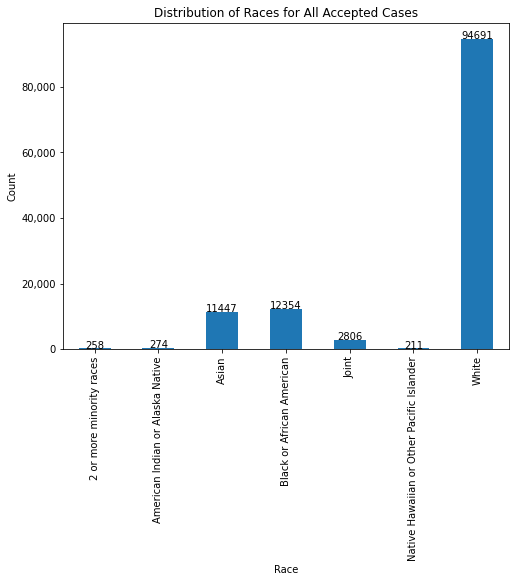

In [54]:
race_all = df.loc[((df['derived_race'] != "Free Form Text Only") & (df['derived_race'] != "Race Not Available"))]

race_all = race_all.groupby('derived_race')['derived_race'].count()

plt.figure(figsize=(8, 6))
ax = race_all.plot(kind='bar')
plt.xlabel('Race')
plt.ylabel('Count')
plt.title('Distribution of Races for All Accepted Cases')


ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda value, pos: f"{value:,.0f}"))

for index, value in enumerate(race_all):
    plt.annotate(str(value), xy=(index, value), ha='center')
plt.savefig('Distribution of Races for All Accepted Cases')

plt.show()

Text(0.5, 1.0, 'Mean Loan Amount for Each Race')

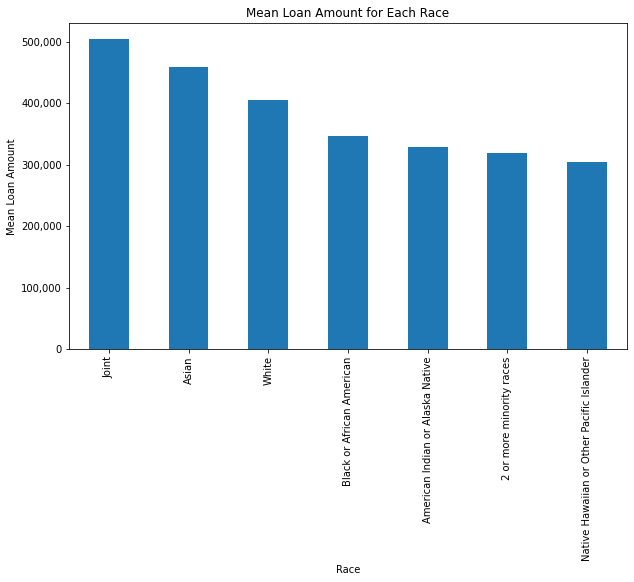

In [67]:
race = df.loc[((df['derived_race'] != "Free Form Text Only") & (df['derived_race'] != "Race Not Available"))]
race = race.groupby('derived_race')['loan_amount'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
ax = race.plot(kind='bar')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda value, pos: f"{value:,.0f}"))
plt.xlabel('Race')
plt.ylabel('Mean Loan Amount')
plt.title('Mean Loan Amount for Each Race')


In [17]:
# remove rejected cases and "Free Form Text Only" race type
df_accept = df.loc[df["action_taken"].isin([1])]
df_accept = df_accept.loc[((df_accept['derived_race'] != "Free Form Text Only"))]


# group the original dataframe by 'derived_race' and 'census_tract'
grouped = df_accept.groupby(['derived_race','census_tract']).mean()['loan_amount'].reset_index()

# create a pivot table with 'census_tract' as index, 'derived_sex' as columns, and 'loan_amount' as values
pivot_table = pd.pivot_table(grouped, values='loan_amount', index='census_tract', columns='derived_race')

# reset the index to create a new dataframe with 'census_tract' as a separate column
new_df = pivot_table.reset_index()

# rename the columns to remove the 'derived_sex' prefix
new_df.columns = ['census_tract'] + list(new_df.columns[1:].str.split('_').str[1])

# fill any missing values with 0
# new_df = new_df.fillna(0)
new_df = new_df.fillna(new_df.mean())

# create a list of derived_race types from the original dataframe
sex_types = df_accept['derived_race'].unique().tolist()

# iterate over the columns of the new dataframe and rename them
for i in range(1, len(new_df.columns)):
    new_df = new_df.rename(columns={new_df.columns[i]: sex_types[i-1]})

# def mergeDF(df1, df2, )

# print(tracts.head())
new_df.head()

,census_tract,White,Race Not Available,Black or African American,Joint,Asian,American Indian or Alaska Native,Native Hawaiian or Other Pacific Islander,2 or more minority races
0,25021400100,371538.461538,371538.461538,698703.703704,665000.0,780000.000000,371538.461538,2.208409e+06,862738.095238
1,25021400200,371538.461538,371538.461538,504310.344828,205000.0,580000.000000,371538.461538,1.034565e+06,576206.896552
2,25021400300,371538.461538,371538.461538,612333.333333,795000.0,875000.000000,371538.461538,1.119545e+06,731792.452830
3,25021400400,371538.461538,371538.461538,674791.666667,255000.0,698571.428571,371538.461538,1.116667e+06,636642.857143
4,25021400500,371538.461538,371538.461538,588870.967742,835000.0,888636.363636,371538.461538,1.070128e+06,679684.684685


In [18]:
merge_tract = tracts.merge(new_df, left_on='GEOID20', right_on='census_tract', how='left')
merge_tract.head()

,OBJECTID,STATEFP20,COUNTYFP20,TRACTCE20,GEOID20,NAME20,NAMELSAD20,MTFCC20,FUNCSTAT20,ALAND20,...,geometry,census_tract,White,Race Not Available,Black or African American,Joint,Asian,American Indian or Alaska Native,Native Hawaiian or Other Pacific Islander,2 or more minority races
0,1,25,025,140202,25025140202,1402.02,Census Tract,G5020,S,1538599,...,"POLYGON ((757373.036 2913676.433, 757377.218 2...",25025140202,395000.000000,371538.461538,403333.333333,411533.333333,349285.714286,371538.461538,412424.242424,393970.588235
1,2,25,025,140300,25025140300,1403,Census Tract,G5020,S,1548879,...,"POLYGON ((756308.459 2916770.814, 756446.058 2...",25025140300,228333.333333,371538.461538,383333.333333,327000.000000,436666.666667,371538.461538,478666.666667,396818.181818
2,3,25,025,140400,25025140400,1404,Census Tract,G5020,S,1874512,...,"POLYGON ((757682.058 2924622.055, 757807.152 2...",25025140400,290000.000000,385000.000000,225000.000000,301815.286624,378333.333333,305000.000000,284350.649351,344464.285714
3,4,25,025,140106,25025140106,1401.06,Census Tract,G5020,S,278837,...,"POLYGON ((753408.502 2925331.042, 753418.584 2...",25025140106,371538.461538,371538.461538,485000.000000,375000.000000,371538.461538,371538.461538,300000.000000,494166.666667
4,5,25,025,110201,25025110201,1102.01,Census Tract,G5020,S,348208,...,"POLYGON ((759003.960 2926858.165, 759043.379 2...",25025110201,371538.461538,371538.461538,75000.000000,334047.619048,365000.000000,371538.461538,553421.052632,358809.523810


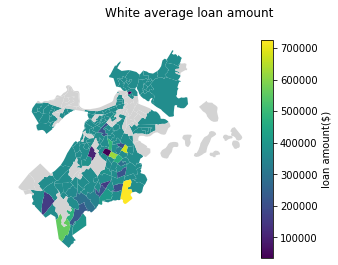

<Figure size 864x648 with 0 Axes>

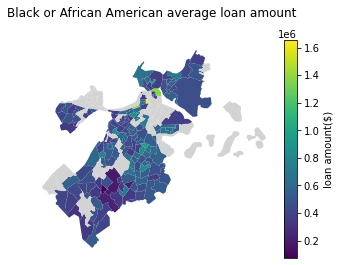

<Figure size 864x648 with 0 Axes>

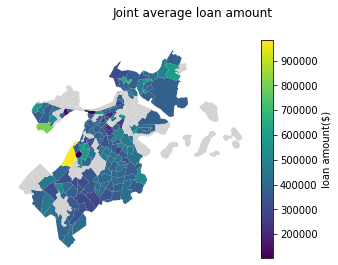

<Figure size 864x648 with 0 Axes>

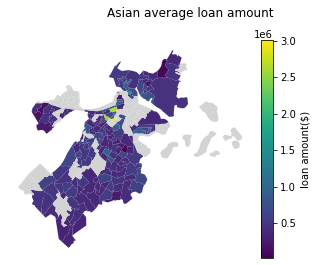

<Figure size 864x648 with 0 Axes>

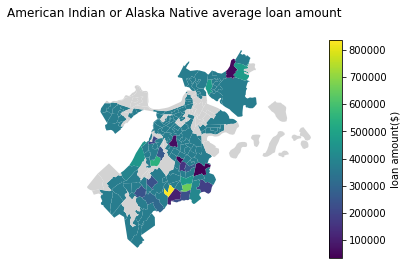

<Figure size 864x648 with 0 Axes>

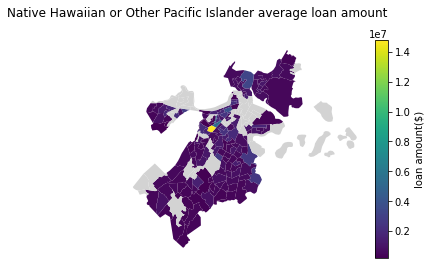

<Figure size 864x648 with 0 Axes>

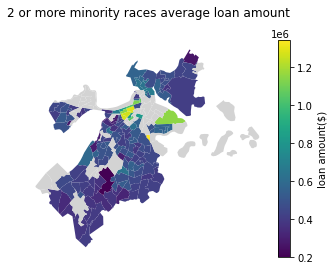

<Figure size 864x648 with 0 Axes>

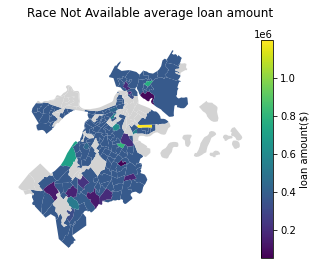

<Figure size 864x648 with 0 Axes>

In [64]:

from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.ticker as ticker
for colName in ['White','Black or African American','Joint','Asian','American Indian or Alaska Native','Native Hawaiian or Other Pacific Islander','2 or more minority races','Race Not Available']:
    fig, ax = plt.subplots(1, 1)
    ax.set_axis_off()

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    
    
   

    cb = merge_tract.plot(column=colName, ax=ax, legend=True,legend_kwds={'label': "loan amount($)",
                    }, cax=cax, missing_kwds={'color': 'lightgrey'})

    plt.title(colName + " average loan amount", y=1.08,loc='right')
    plt.figure(figsize=(12,9))
    plt.savefig('Map Average Loan Amount Based on Each Census Tract for Each Race.png')

    # fmt = "${x:,.0f}" '{:.0f}'
    # tick_format = ticker.StrMethodFormatter(fmt)
    # cax.yaxis.set_major_formatter(tick_format)


    # ax.yaxis.set_major_formatter(
    #     ticker.FuncFormatter(lambda y,  p: format(int(y), ',')))


    # plt.show()

## try to align legend bar tick values with two different ways, but the map does not show so much of important info as before since the range of the unified legend is way too big. There is hardly any difference between census tracts in most of the race vs. loan amount map

25000.0
14755000.0


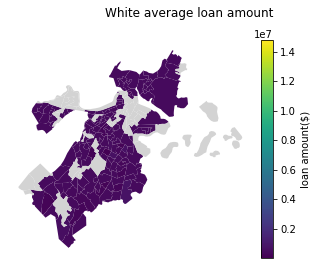

<Figure size 864x648 with 0 Axes>

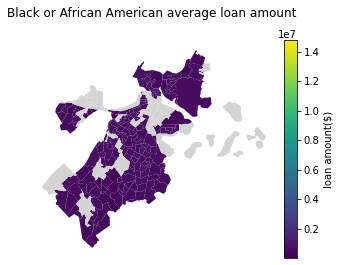

<Figure size 864x648 with 0 Axes>

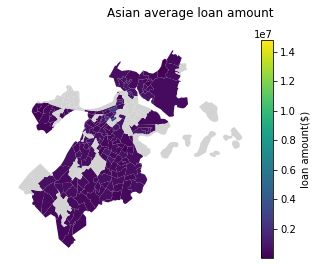

<Figure size 864x648 with 0 Axes>

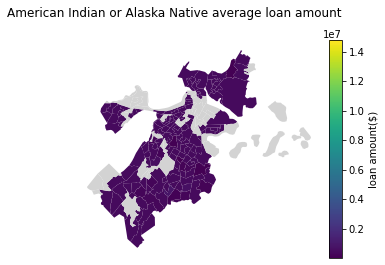

<Figure size 864x648 with 0 Axes>

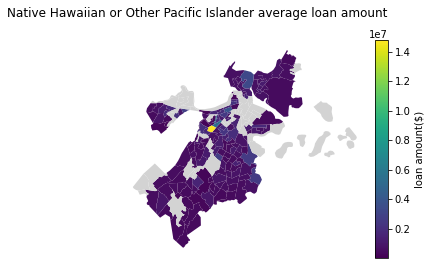

<Figure size 864x648 with 0 Axes>

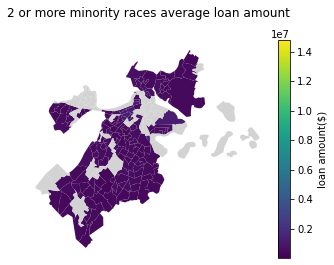

<Figure size 864x648 with 0 Axes>

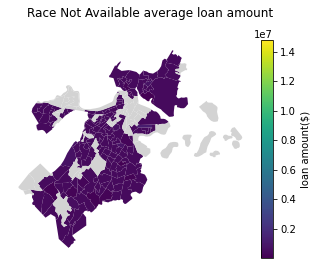

<Figure size 864x648 with 0 Axes>

In [61]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.ticker as ticker
import pandas as pd
import numpy as np



# Calculate the global minimum and maximum values across all the columns
global_min = merge_tract[['White','Black or African American','Asian','American Indian or Alaska Native','Native Hawaiian or Other Pacific Islander','2 or more minority races','Race Not Available']].min().min()
print(global_min)
global_max = merge_tract[['White','Black or African American','Asian','American Indian or Alaska Native','Native Hawaiian or Other Pacific Islander','2 or more minority races','Race Not Available']].max().max()
print(global_max)

for colName in ['White','Black or African American','Asian','American Indian or Alaska Native','Native Hawaiian or Other Pacific Islander','2 or more minority races','Race Not Available']:
    fig, ax = plt.subplots(1, 1)
    ax.set_axis_off()

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    
    cb = merge_tract.plot(column=colName, ax=ax, legend=True,legend_kwds={'label': "loan amount($)"},
                          cax=cax, missing_kwds={'color': 'lightgrey'}, vmin=global_min, vmax=global_max)

    plt.title(colName + " average loan amount", y=1.08,loc='right')
    plt.figure(figsize=(12,9))


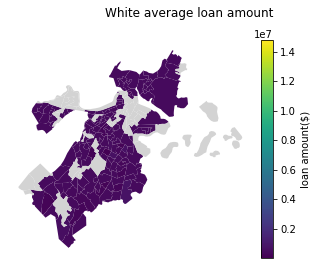

<Figure size 864x648 with 0 Axes>

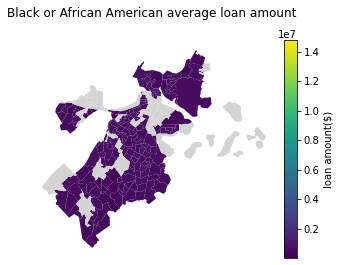

<Figure size 864x648 with 0 Axes>

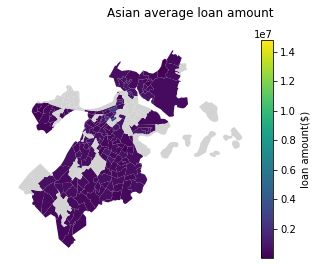

<Figure size 864x648 with 0 Axes>

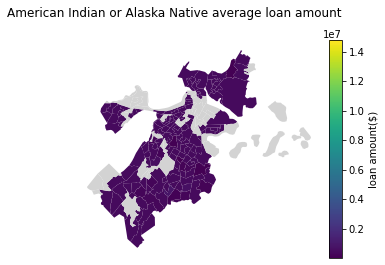

<Figure size 864x648 with 0 Axes>

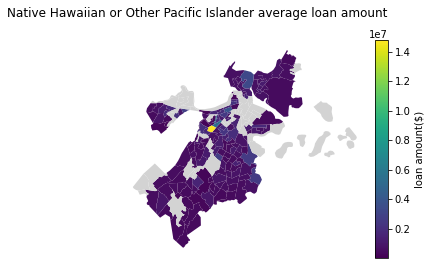

<Figure size 864x648 with 0 Axes>

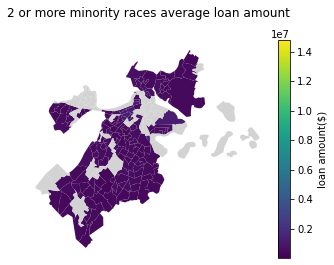

<Figure size 864x648 with 0 Axes>

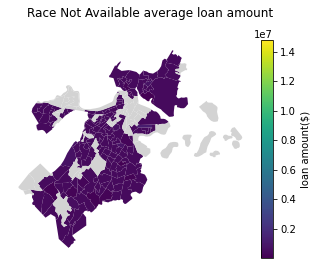

<Figure size 864x648 with 0 Axes>

In [62]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.ticker as ticker
import pandas as pd
import numpy as np

# Calculate the global minimum and maximum values across all the columns
global_min = merge_tract[['White','Black or African American','Asian','American Indian or Alaska Native','Native Hawaiian or Other Pacific Islander','2 or more minority races','Race Not Available']].min().min()
global_max = merge_tract[['White','Black or African American','Asian','American Indian or Alaska Native','Native Hawaiian or Other Pacific Islander','2 or more minority races','Race Not Available']].max().max()

for colName in ['White','Black or African American','Asian','American Indian or Alaska Native','Native Hawaiian or Other Pacific Islander','2 or more minority races','Race Not Available']:
    fig, ax = plt.subplots(1, 1)
    ax.set_axis_off()

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    
    cb = merge_tract.plot(column=colName, ax=ax, legend=True,legend_kwds={'label': "loan amount($)"},
                          cax=cax, missing_kwds={'color': 'lightgrey'}, vmin=global_min, vmax=global_max)

    plt.title(colName + " average loan amount", y=1.08,loc='right')
    plt.figure(figsize=(12,9))
